<a href="https://colab.research.google.com/github/varthini-30/tasksgenai/blob/main/deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone "https://github.com/Gurupatil0003/Brain-Tumor-Data-Set.git"

Cloning into 'Brain-Tumor-Data-Set'...
remote: Enumerating objects: 4076, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4076 (delta 0), reused 0 (delta 0), pack-reused 4073 (from 2)
Receiving objects: 100% (4076/4076), 92.33 MiB | 18.89 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (4855/4855), done.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
img_height = 128
img_width = 128
batch_size = 16

train_dir = "/content/Brain-Tumor-Data-Set/Brain Tumor Data Set/Train"
test_dir = "/content/Brain-Tumor-Data-Set/Brain Tumor Data Set/Test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

num_classes = train_data.num_classes


Found 3903 images belonging to 2 classes.
Found 950 images belonging to 2 classes.


In [ ]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_history = cnn_model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 147s 593ms/step - accuracy: 0.6506 - loss: 0.6712 - val_accuracy: 0.7463 - val_loss: 0.4995
Epoch 2/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 138s 566ms/step - accuracy: 0.7818 - loss: 0.4736 - val_accuracy: 0.8105 - val_loss: 0.4398
Epoch 3/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 142s 566ms/step - accuracy: 0.7949 - loss: 0.4422 - val_accuracy: 0.8389 - val_loss: 0.3627
Epoch 4/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 139s 569ms/step - accuracy: 0.8499 - loss: 0.3421 - val_accuracy: 0.8432 - val_loss: 0.3806
Epoch 5/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 144s 589ms/step - accuracy: 0.8755 - loss: 0.2998 - val_accuracy: 0.8368 - val_loss: 0.3796
Epoch 6/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 140s 575ms/step - accuracy: 0.8815 - loss: 0.2668 - val_accuracy: 0.9021 - val_loss: 0.2602
Epoch 7/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 142s 582ms/step - accuracy: 0.9167 - loss: 0.2190 - val_accuracy: 0.8421 - val_loss: 0.5104
Epoch 8/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 141s 578ms/step - accuracy: 0.9096 -

In [ ]:
cnn_rnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Reshape((1, -1)),

    layers.SimpleRNN(64),
    layers.Dense(num_classes, activation='softmax')
])

cnn_rnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_rnn_history = cnn_rnn_model.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)


Epoch 1/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 115s 462ms/step - accuracy: 0.6452 - loss: 0.7286 - val_accuracy: 0.7705 - val_loss: 0.5605
Epoch 2/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 109s 446ms/step - accuracy: 0.7993 - loss: 0.4599 - val_accuracy: 0.7442 - val_loss: 0.6189
Epoch 3/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 113s 463ms/step - accuracy: 0.8182 - loss: 0.4206 - val_accuracy: 0.7558 - val_loss: 0.6159
Epoch 4/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 109s 444ms/step - accuracy: 0.8260 - loss: 0.4127 - val_accuracy: 0.7747 - val_loss: 0.4978
Epoch 5/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 115s 470ms/step - accuracy: 0.8455 - loss: 0.3655 - val_accuracy: 0.8158 - val_loss: 0.3893


In [ ]:
cnn_gru_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Reshape((1, -1)),

    layers.GRU(64),
    layers.Dense(num_classes, activation='softmax')
])

cnn_gru_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_gru_history = cnn_gru_model.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)


Epoch 1/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 165s 662ms/step - accuracy: 0.6024 - loss: 0.7260 - val_accuracy: 0.7347 - val_loss: 0.5514
Epoch 2/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 154s 632ms/step - accuracy: 0.7327 - loss: 0.5139 - val_accuracy: 0.7705 - val_loss: 0.4707
Epoch 3/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 150s 614ms/step - accuracy: 0.8049 - loss: 0.4267 - val_accuracy: 0.7674 - val_loss: 0.4591
Epoch 4/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 202s 614ms/step - accuracy: 0.8026 - loss: 0.4130 - val_accuracy: 0.7705 - val_loss: 0.4520
Epoch 5/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 160s 655ms/step - accuracy: 0.8371 - loss: 0.3707 - val_accuracy: 0.7968 - val_loss: 0.3941


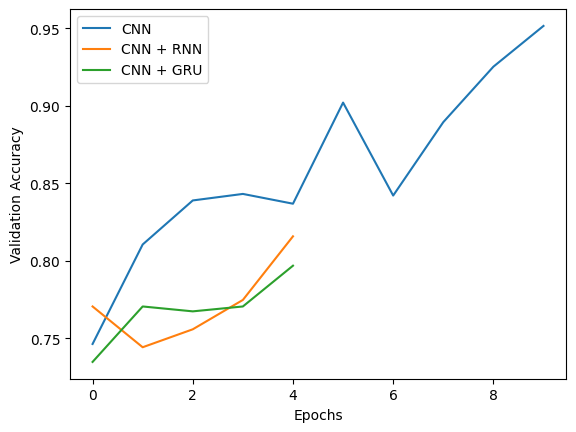

In [ ]:
plt.plot(cnn_history.history['val_accuracy'], label='CNN')
plt.plot(cnn_rnn_history.history['val_accuracy'], label='CNN + RNN')
plt.plot(cnn_gru_history.history['val_accuracy'], label='CNN + GRU')

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


In [ ]:
class_labels = train_data.class_indices
print(class_labels)


{'Cancer': 0, 'Not cancer': 1}


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving braintumour.jpeg to braintumour.jpeg


In [ ]:
img_path="/content/braintumour.jpeg"

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)


In [ ]:
prediction = cnn_gru_model.predict(img_array)
predicted_class = np.argmax(prediction)
confidence = np.max(prediction)

print("Predicted class:", labels[predicted_class])
print("Confidence:", confidence)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Predicted class: Cancer
Confidence: 0.9411432


In [ ]:
if labels[predicted_class] == "no_tumor":
    print("🟢 RESULT: NO TUMOUR DETECTED")
else:
    print("🔴 RESULT: TUMOUR DETECTED")


🔴 RESULT: TUMOUR DETECTED


In [ ]:

labels = list(train_data.class_indices.keys())
print(labels)


['Cancer', 'Not cancer']
